# Comparación de distintos criterios de enlace en Hierarchical Clustering y K-Means

De modo similar a este ejemplo de `sklearn` (https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html), este notebook compara los resultados obtenidos al emplear distintos criterios de enlace en Hierarchical Clustering y K-Means en varios conjuntos de datos de prueba.

Comenzamos importando las librerías necesarias y definiendo una semilla para que los resultados sean reproducibles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster

np.random.seed(0)

random_state = 170

Definimos una función que recibe un dataset y el número de clusters a identificar y que se encarga de ejecutar los hierarchical clustering con distintos criterios de enlace y K-Means, haciendo un gráfico para representar visualmetne cada agrupamiento.

In [11]:
def compareClusterMethods(dataset, k):
    
    X, y = dataset

    X = StandardScaler().fit_transform(X)

    # Hierarchical clustering: single-linkage

    linked_single = linkage(X, 'single')

    clusters_single = fcluster(linked_single, k, criterion = 'maxclust')

    # Hierarchical clustering: complete-linkage

    linked_complete = linkage(X, 'complete')

    clusters_complete = fcluster(linked_complete, k, criterion = 'maxclust')

    # Hierarchical clustering: average-linkage (UPGMA)

    linked_average = linkage(X, 'average')

    clusters_average = fcluster(linked_average, k, criterion = 'maxclust')

    # Hierarchical clustering: centroid-linkage (UPGMA)

    linked_centroid = linkage(X, 'centroid')

    clusters_centroid = fcluster(linked_centroid, k, criterion = 'maxclust')

    # Hierarchical clustering: ward's criterion

    linked_ward = linkage(X, 'ward')

    clusters_ward = fcluster(linked_ward, k, criterion = 'maxclust')

    # K-Means

    kmeans = KMeans(n_clusters=k).fit(X)

    clusters_kmeans = kmeans.predict(X)


    fig, axs = plt.subplots(2, 3, figsize=(13,9))
    fig.tight_layout(pad=3.0)
    axs[0, 0].scatter(X[:, 0], X[:, 1], s=10, c=clusters_single, cmap='viridis')
    axs[0, 0].set_title('Minimum-linkage')
    axs[0, 1].scatter(X[:, 0], X[:, 1], s=10, c=clusters_complete, cmap='viridis')
    axs[0, 1].set_title('Complete-linkage')
    axs[0, 2].scatter(X[:, 0], X[:, 1], s=10, c=clusters_average, cmap='viridis')
    axs[0, 2].set_title('Average')
    axs[1, 0].scatter(X[:, 0], X[:, 1], s=10, c=clusters_centroid, cmap='viridis')
    axs[1, 0].set_title('Centroid')
    axs[1, 1].scatter(X[:, 0], X[:, 1], s=10, c=clusters_ward, cmap='viridis')
    axs[1, 1].set_title('Ward')
    axs[1, 2].scatter(X[:, 0], X[:, 1], s=10, c=clusters_kmeans, cmap='viridis')
    axs[1, 2].set_title('K-Means')

Y ahora utilizamos esta función para analizar distintos datasets "de juguete" con formas particulares.

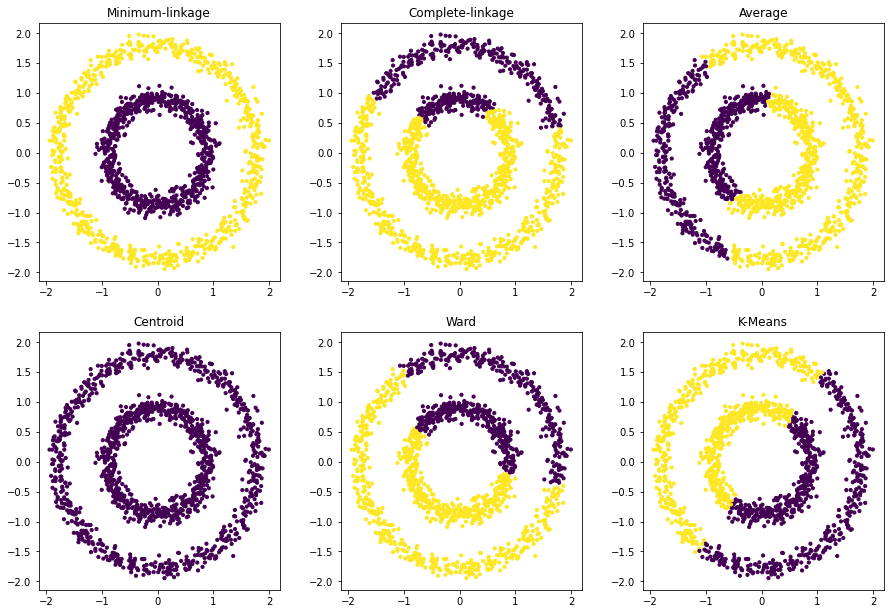

In [12]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
compareClusterMethods(noisy_circles, 2)

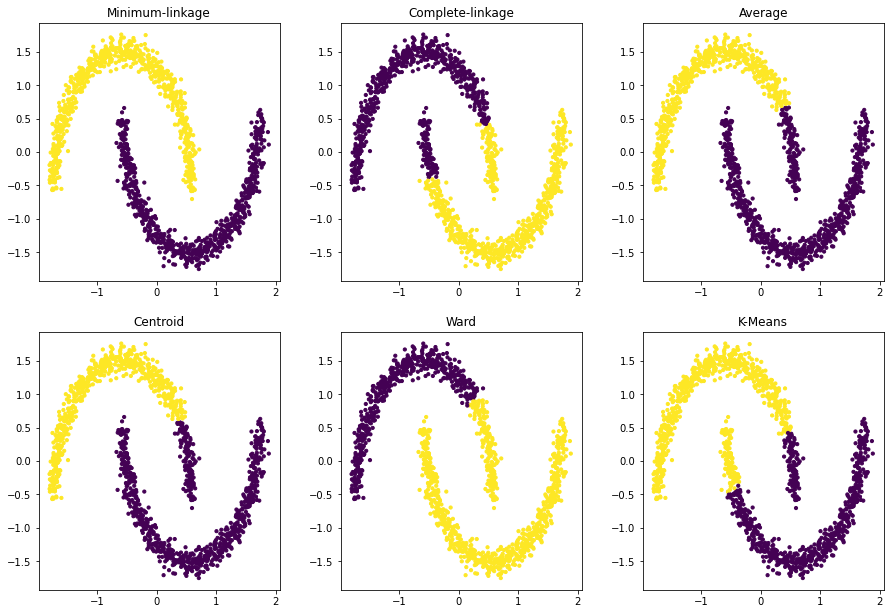

In [14]:
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
compareClusterMethods(noisy_moons, 2)

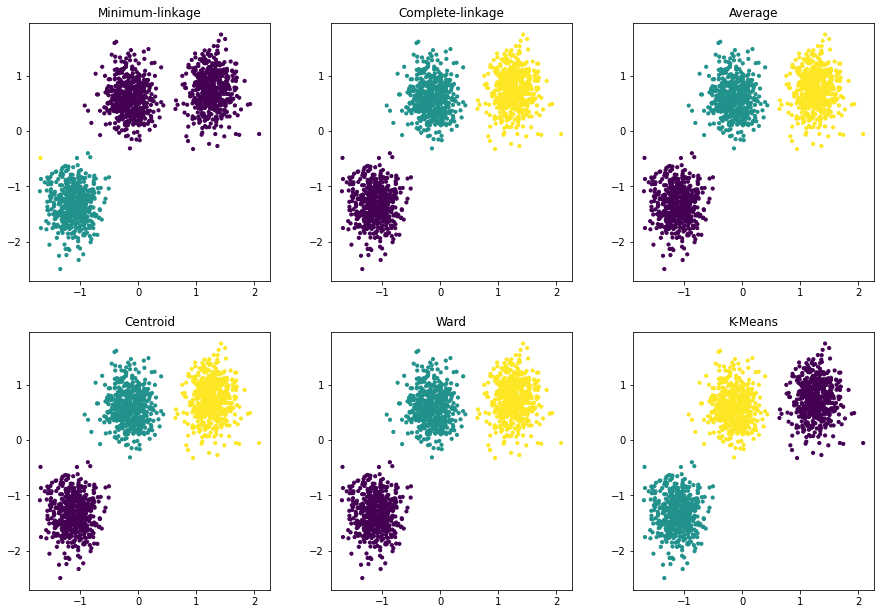

In [16]:
n_samples=1500
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
compareClusterMethods(blobs, 3)

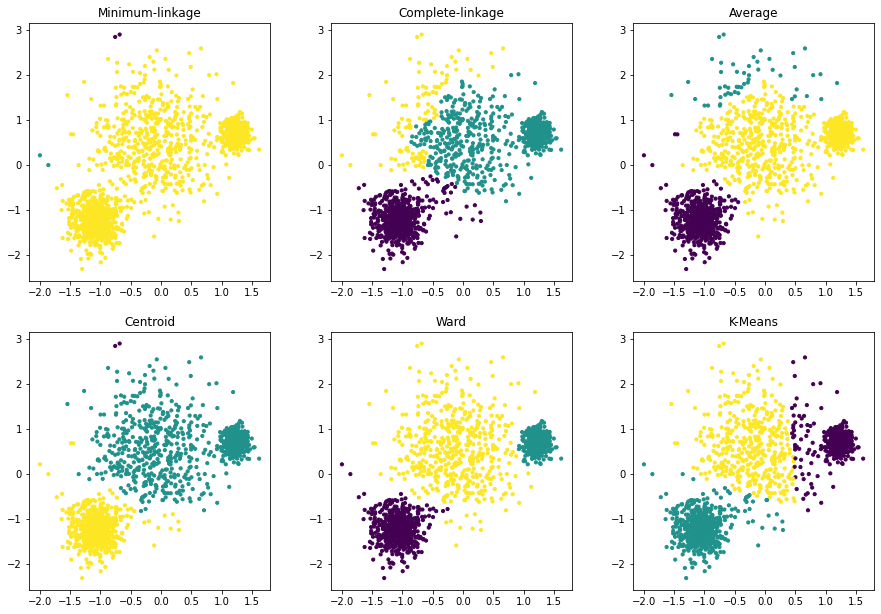

In [17]:
# blobs with varied variances

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
compareClusterMethods(varied, 3)

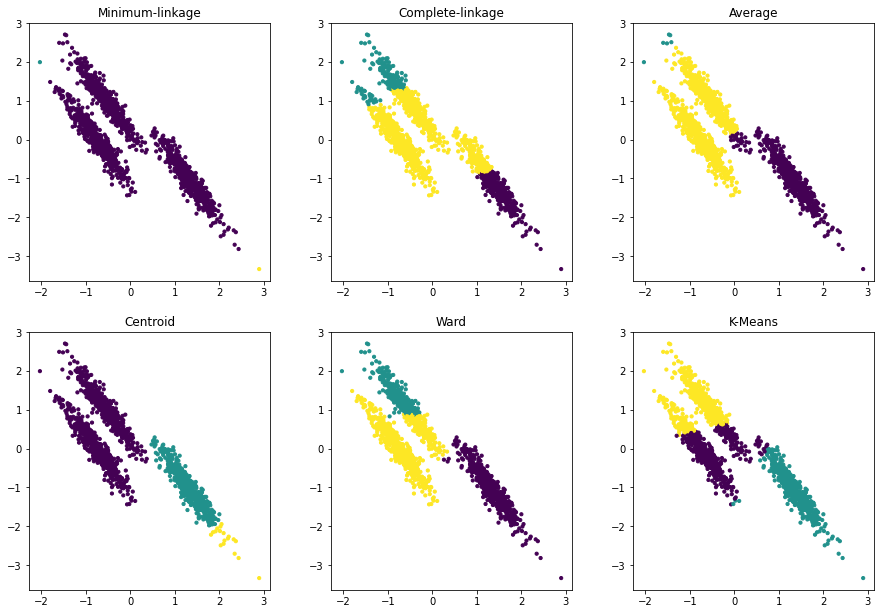

In [18]:
# Anisotropicly distributed data

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

compareClusterMethods(aniso, 3)

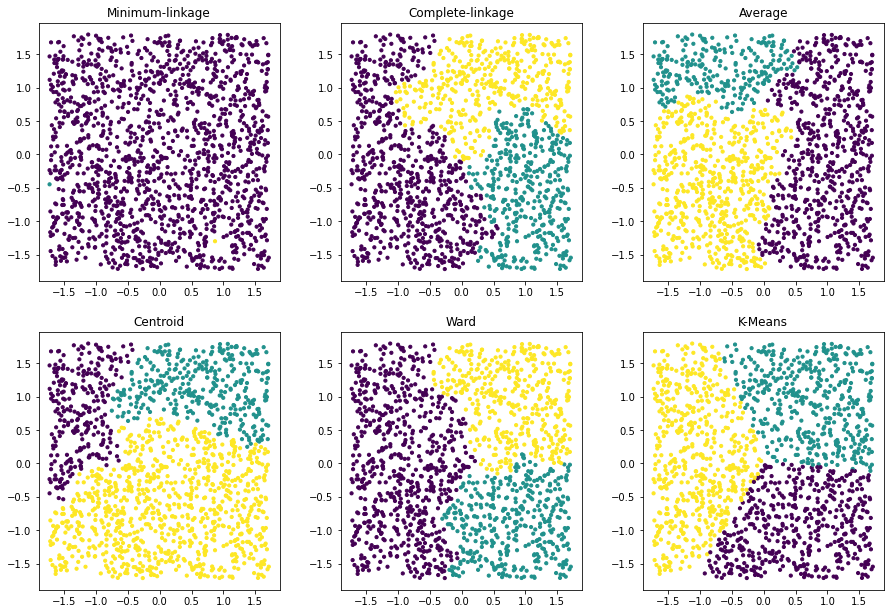

In [21]:
n_samples=1500
no_structure = np.random.rand(n_samples, 2), None

compareClusterMethods(no_structure, 3)